In [3]:
from sklearn.datasets.samples_generator import make_blobs 
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical 
from matplotlib import pyplot

Using TensorFlow backend.


In [5]:
# Prepare multi-class classification dataset
def create_dataset():
    
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)
    
    # one hot encode output variable
    y = to_categorical(y)
    
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:,:]
    trainy, testy = y[:n_train], y[n_train:]
    
    return trainX, trainy, testX, testy

In [12]:
# Fit model with given number of nodes. returns test set accuracy
def evaluate_model(n_nodes, trainX, trainy, testX, testy):
    
    # Configure the model based on the data
    n_input, n_classes = trainX.shape[1], testy.shape[1]
    
    # Define model
    model = Sequential()
    
    # n_nodes defines the number of node in this layer
    # input_dim is input dimension
    # activation function is defined as 'relu' 
    # kernel_initializer (he_uniform) is weight initialization method
    model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    # output layer will use the softmax activation function in order to predict a probability for each target class
    model.add(Dense(n_classes, activation='softmax'))
    
    # Compile model
    # the model will be optimized using stochastic gradient descent with a modest learning rate of 0.01
    # with a high momentum of 0.9
    # categorical cross-entropy loss function will be used, suitable for multiclass classification
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # Fit model on train set
    history = model.fit(trainX, trainy, epochs=100, verbose=0)
    
    # evaluate model on test set
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    
    return history, test_acc

In [13]:
# Prepare dataset
trainX, trainy, testX, testy = create_dataset()

In [14]:
# Evaluate model and plot learning curve with given number of nodes
num_nodes = [i for i in range(1,8)]

Accuracy for nodes=1: 0.136
Accuracy for nodes=2: 0.416
Accuracy for nodes=3: 0.676
Accuracy for nodes=4: 0.598
Accuracy for nodes=5: 0.886
Accuracy for nodes=6: 0.948
Accuracy for nodes=7: 0.982


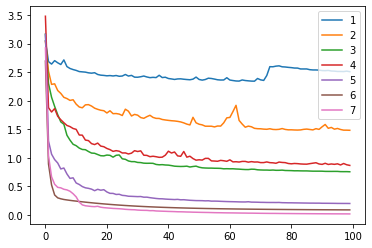

In [27]:
for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)
    # summarize final test set accuracy 
    print('Accuracy for nodes=%d: %.3f' % (n_nodes, result))
    # plot learning curve
    pyplot.plot(history.history['loss'], label=str(n_nodes))
# show the plot
pyplot.legend()
pyplot.show()